In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

/Users/dingding/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/dingding/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
data=pd.read_csv('/Users/dingding/Desktop/GIIIUS_daily_new.csv')
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

Donchian_3    1
dtype: int64

In [3]:
data=data.dropna(subset = ['Donchian_3'])

In [4]:
data=data.drop(['field','RETURN_COM_EQY','EBITDA','IS_EPS','PROF_MARGIN','ROC_3','Return_3','return/ebitda','return/EPS','return/pro','return/ROE'],axis = 1)

In [28]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=2):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['TRD_3'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    #Print Feature Importance:
    if performCV and printFeatureImportance: 
        
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['TRD_3'], cv=cv_folds, scoring='roc_auc')
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances with Gradient Boosting')
        plt.ylabel('Feature Importance Score')
       
        
    #Perform cross-validation:
    #if performCV:
        
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['TRD_3'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['TRD_3'], dtrain_predprob))
    

In [29]:
from sklearn.preprocessing import label_binarize
data['TRD_3'] = label_binarize(data['TRD_3'], classes=[1, 2, 3])

CV Score : Mean - 0.8392776 | Std - 0.02084535 | Min - 0.8184322 | Max - 0.8601229

Model Report
Accuracy : 0.883
AUC Score (Train): 0.960490


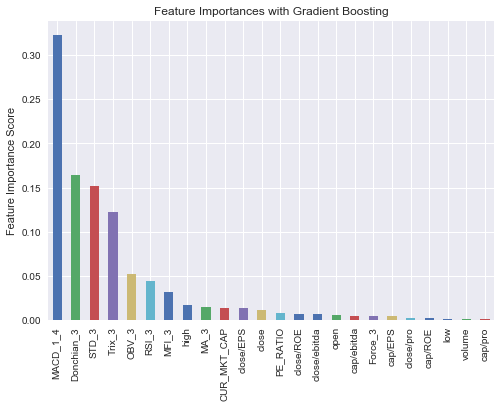

In [30]:
target = 'TRD_3'
IDcol = 'rank_id'
predictors = [x for x in data.columns if x not in [target, IDcol]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, data, predictors)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb #Gradient boosting

from xgboost import XGBClassifier
print(dir(xgb)) 
from sklearn.model_selection import train_test_split #model selection
from sklearn.feature_selection import SelectFromModel #model selection
from sklearn.metrics import accuracy_score #model testing
import matplotlib.mlab as mlab  

['Booster', 'DMatrix', 'VERSION_FILE', 'XGBClassifier', 'XGBModel', 'XGBRegressor', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'absolute_import', 'callback', 'compat', 'core', 'cv', 'f', 'libpath', 'os', 'plot_importance', 'plot_tree', 'plotting', 'rabit', 'sklearn', 'to_graphviz', 'train', 'training']


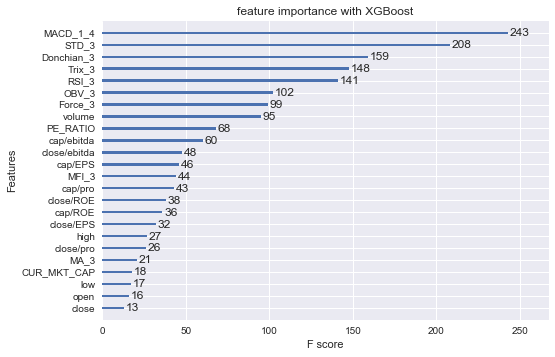

In [31]:
num_test = 0.20
seed = 10
(X_all, y_all) = (data.drop("TRD_3", axis = 1, inplace = False), data["TRD_3"])
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, random_state=seed)
model_0 = xgb.XGBClassifier(learning_rate = 0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1, seed = seed).fit(X_test, y_test, verbose = True, eval_metric="auc")
xgb.plot_importance(model_0,title='feature importance with XGBoost')
plt.show()





Test accuracy with all features: 	0.7039848197343453
Validation accuracy with all features: 	0.708649468892261

gen	nevals	avg     	std     	min     	max     
0  	100   	0.642182	0.100528	0.506641	0.848197
1  	57    	0.702296	0.0818578	0.508539	0.848197
2  	59    	0.743197	0.0580504	0.51518 	0.848197
3  	61    	0.758387	0.0749652	0.503795	0.850095
4  	47    	0.803662	0.0459467	0.510436	0.85389 
5  	61    	0.827343	0.0411935	0.523719	0.856736
6  	65    	0.823197	0.0720587	0.511385	0.863378
7  	49    	0.841727	0.0348461	0.530361	0.864326
8  	69    	0.843937	0.0409547	0.510436	0.868121
9  	50    	0.851765	0.0320723	0.548387	0.868121
10 	60    	0.845446	0.0580323	0.52277 	0.868121

---Optimal Feature Subset(s)---

Percentile: 			0.9731958762886598
Validation Accuracy: 		0.9028831562974203
Individual: 	[1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]
Number Features In Subset: 	9
Feature Subset: ['high', 'open', 'MA_3', 'Trix_3', 'MACD_1_4', 'Force_3', 'cap/ROE', 'c

/Users/dingding/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0


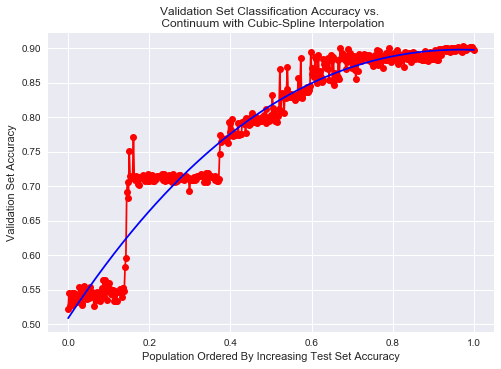

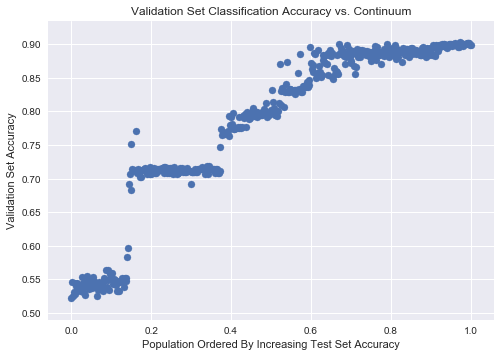

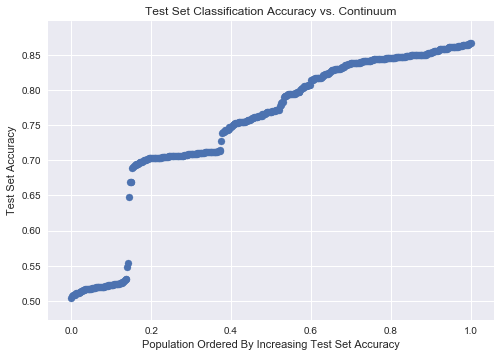

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from deap import creator, base, tools, algorithms
#from scoop import futures
import random
import numpy
from scipy import interpolate
import matplotlib.pyplot as plt



# Form training, test, and validation sets
X_trainAndTest, X_validation, y_trainAndTest, y_validation = train_test_split(X_all, y_all, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_trainAndTest, y_trainAndTest, test_size=0.20, random_state=42)

# Feature subset fitness function
def getFitness(individual, X_train, X_test, y_train, y_test):

	# Parse our feature columns that we don't use
	# Apply one hot encoding to the features
	cols = [index for index in range(len(individual)) if individual[index] == 0]
	X_trainParsed = X_train.drop(X_train.columns[cols], axis=1)
	X_trainOhFeatures = pd.get_dummies(X_trainParsed)
	X_testParsed = X_test.drop(X_test.columns[cols], axis=1)
	X_testOhFeatures = pd.get_dummies(X_testParsed)

	# Remove any columns that aren't in both the training and test sets
	sharedFeatures = set(X_trainOhFeatures.columns) & set(X_testOhFeatures.columns)
	removeFromTrain = set(X_trainOhFeatures.columns) - sharedFeatures
	removeFromTest = set(X_testOhFeatures.columns) - sharedFeatures
	X_trainOhFeatures = X_trainOhFeatures.drop(list(removeFromTrain), axis=1)
	X_testOhFeatures = X_testOhFeatures.drop(list(removeFromTest), axis=1)

	# Apply logistic regression on the data, and calculate accuracy
	clf = LogisticRegression()
	clf.fit(X_trainOhFeatures, y_train)
	predictions = clf.predict(X_testOhFeatures)
	accuracy = accuracy_score(y_test, predictions)

	# Return calculated accuracy as fitness
	return (accuracy,)

#========DEAP GLOBAL VARIABLES (viewable by SCOOP)========

# Create Individual
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Create Toolbox
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(data.columns) - 1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Continue filling toolbox...
toolbox.register("evaluate", getFitness, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

#========

def getHof():

	# Initialize variables to use eaSimple
	numPop = 100
	numGen = 10
	pop = toolbox.population(n=numPop)
	hof = tools.HallOfFame(numPop * numGen)
	stats = tools.Statistics(lambda ind: ind.fitness.values)
	stats.register("avg", numpy.mean)
	stats.register("std", numpy.std)
	stats.register("min", numpy.min)
	stats.register("max", numpy.max)

	# Launch genetic algorithm
	pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=numGen, stats=stats, halloffame=hof, verbose=True)

	# Return the hall of fame
	return hof

def getMetrics(hof):

	# Get list of percentiles in the hall of fame
	percentileList = [i / (len(hof) - 1) for i in range(len(hof))]
	
	# Gather fitness data from each percentile
	testAccuracyList = []
	validationAccuracyList = []
	individualList = []
	for individual in hof:
		testAccuracy = individual.fitness.values
		validationAccuracy = getFitness(individual, X_trainAndTest, X_validation, y_trainAndTest, y_validation)
		testAccuracyList.append(testAccuracy[0])
		validationAccuracyList.append(validationAccuracy[0])
		individualList.append(individual)
	testAccuracyList.reverse()
	validationAccuracyList.reverse()
	return testAccuracyList, validationAccuracyList, individualList, percentileList


if __name__ == '__main__':

	'''
	First, we will apply logistic regression using all the features to acquire a baseline accuracy.
	'''
	individual = [1 for i in range(len(X_all.columns))]
	testAccuracy = getFitness(individual, X_train, X_test, y_train, y_test)
	validationAccuracy = getFitness(individual, X_trainAndTest, X_validation, y_trainAndTest, y_validation)
	print('\nTest accuracy with all features: \t' + str(testAccuracy[0]))
	print('Validation accuracy with all features: \t' + str(validationAccuracy[0]) + '\n')

	'''
	Now, we will apply a genetic algorithm to choose a subset of features that gives a better accuracy than the baseline.
	'''
	hof = getHof()
	testAccuracyList, validationAccuracyList, individualList, percentileList = getMetrics(hof)

	# Get a list of subsets that performed best on validation data
	maxValAccSubsetIndicies = [index for index in range(len(validationAccuracyList)) if validationAccuracyList[index] == max(validationAccuracyList)]
	maxValIndividuals = [individualList[index] for index in maxValAccSubsetIndicies]
	maxValSubsets = [[list(X_all)[index] for index in range(len(individual)) if individual[index] == 1] for individual in maxValIndividuals]

	print('\n---Optimal Feature Subset(s)---\n')
	for index in range(len(maxValAccSubsetIndicies)):
		print('Percentile: \t\t\t' + str(percentileList[maxValAccSubsetIndicies[index]]))
		print('Validation Accuracy: \t\t' + str(validationAccuracyList[maxValAccSubsetIndicies[index]]))
		print('Individual: \t' + str(maxValIndividuals[index]))
		print('Number Features In Subset: \t' + str(len(maxValSubsets[index])))
		print('Feature Subset: ' + str(maxValSubsets[index]))

	'''
	Now, we plot the test and validation classification accuracy to see how these numbers change as we move from our worst feature subsets to the 
	best feature subsets found by the genetic algorithm.
	'''
	# Calculate best fit line for validation classification accuracy (non-linear)
	tck = interpolate.splrep(percentileList, validationAccuracyList, s=5.0)
	ynew = interpolate.splev(percentileList, tck)

	e = plt.figure(1)
	plt.plot(percentileList, validationAccuracyList, marker='o', color='r')
	plt.plot(percentileList, ynew, color='b')
	plt.title('Validation Set Classification Accuracy vs. \n Continuum with Cubic-Spline Interpolation')
	plt.xlabel('Population Ordered By Increasing Test Set Accuracy')
	plt.ylabel('Validation Set Accuracy')
	e.show()

	f = plt.figure(2)
	plt.scatter(percentileList, validationAccuracyList)
	plt.title('Validation Set Classification Accuracy vs. Continuum')
	plt.xlabel('Population Ordered By Increasing Test Set Accuracy')
	plt.ylabel('Validation Set Accuracy')
	f.show()

	g = plt.figure(3)
	plt.scatter(percentileList, testAccuracyList)
	plt.title('Test Set Classification Accuracy vs. Continuum')
	plt.xlabel('Population Ordered By Increasing Test Set Accuracy')
	plt.ylabel('Test Set Accuracy')
	g.show()

	input()





In [100]:
features=data.iloc[:,2:-3]
labels=data.iloc[:,-1]
minutedata

,close,high,low,open,volume,MA_3,Trix_3,MACD_1_4,Momentum_3,RSI_3,MFI_3,OBV_3,Force_3,STD_3,Donchian_3,ROC_3,TRD_3
0,36.7500,36.8300,36.750,36.8300,200,36.746667,2.002930e-04,-0.015302,0.1600,0.513514,0.333333,133.333333,-539.0400,0.095044,0.7200,0.002729,1
1,36.8000,36.8200,36.740,36.8050,600,36.796667,2.453980e-04,0.020140,0.1500,0.463415,0.666667,300.000000,75.0000,0.045092,0.5700,-0.001086,0
2,36.6900,36.7700,36.680,36.7700,500,36.746667,-1.427460e-04,-0.052881,-0.1500,0.213483,0.333333,-33.333333,0.0000,0.055076,0.1900,-0.001633,0
3,36.4900,36.5950,36.490,36.5950,200,36.660000,-1.047991e-03,-0.150001,-0.2600,0.048346,0.333333,-33.333333,0.0000,0.157162,0.1000,-0.008424,0
4,36.4000,36.6600,36.290,36.5100,11700,36.526667,-1.725685e-03,-0.143023,-0.4000,0.018393,0.000000,-4133.333333,-4440.0000,0.148436,0.1500,-0.007904,0
5,36.2600,36.4200,36.220,36.4100,14120,36.383333,-2.300442e-03,-0.169125,-0.4300,0.012829,0.000000,-8673.333333,-5856.6000,0.115902,0.3300,-0.006303,0
6,36.3700,36.4850,36.250,36.2500,600,36.343333,-1.911423e-03,-0.035389,-0.1200,0.367920,0.333333,-8406.666667,-48.0000,0.073711,0.4800,-0.000824,0
7,36.2300,36.3900,36.200,36.3600,1100,36.286667,-1.839458e-03,-0.105080,-0.1700,0.236849,0.333333,-4873.333333,1802.0000,0.073711,0.4400,-0.000827,0
8,36.3800,36.4000,36.220,36.2200,1200,36.326667,-1.098971e-03,0.026928,0.1200,0.332034,0.666667,233.333333,-1550.4000,0.083865,0.4400,0.000275,1
9,36.4200,36.4200,36.380,36.3800,700,36.343333,-3.697960e-04,0.040136,0.0500,0.554364,0.666667,266.666667,5.0000,0.100167,0.2850,0.005244,1


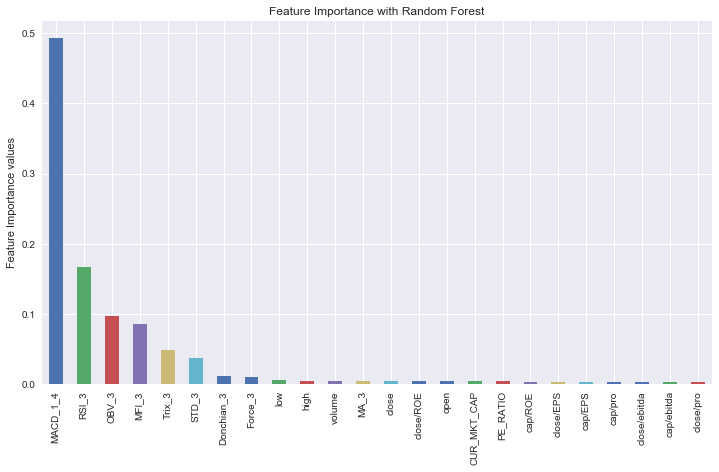

In [12]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

train_x, X_test, train_y, y_test = train_test_split(X_all, y_all, random_state=seed)
rf_clf = RandomForestClassifier(max_depth=15,n_estimators=70, min_samples_leaf=50,
                                  min_samples_split=100, random_state=10)

# Train the model
rf_clf.fit(train_x,train_y)

# Plot the top 40 important features
imp_feat_rf = pd.Series(rf_clf.feature_importances_, index=train_x.columns).sort_values(ascending=False)
imp_feat_rf[:40].plot(kind='bar', title='Feature Importance with Random Forest', figsize=(12,8))
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)
plt.savefig('FeatImportance.png')
plt.show()



Feature ranking:
1. feature 10 (0.205370)
2. feature 11 (0.132809)
3. feature 9 (0.117986)
4. feature 14 (0.051941)
5. feature 12 (0.038168)
6. feature 8 (0.036524)
7. feature 15 (0.033945)
8. feature 4 (0.028807)
9. feature 13 (0.026814)
10. feature 7 (0.024669)
11. feature 3 (0.023888)
12. feature 0 (0.023363)
13. feature 1 (0.023251)
14. feature 6 (0.023077)
15. feature 5 (0.022922)
16. feature 2 (0.022254)
17. feature 21 (0.021662)
18. feature 20 (0.021500)
19. feature 17 (0.020527)
20. feature 18 (0.020277)
21. feature 19 (0.020157)
22. feature 16 (0.020129)
23. feature 23 (0.020126)
24. feature 22 (0.019835)


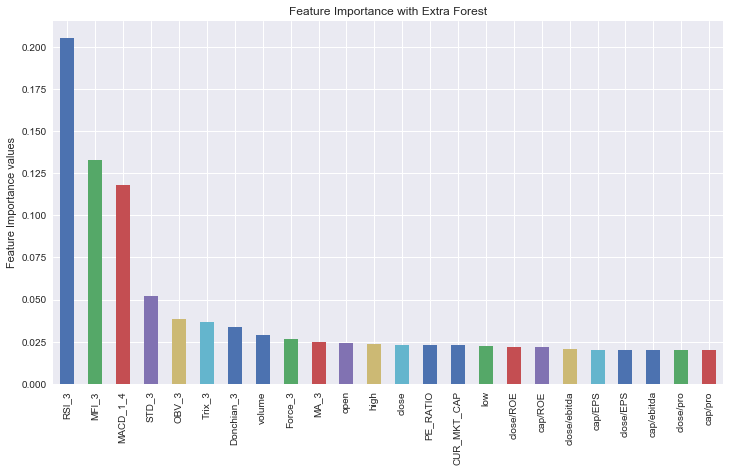

In [32]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier



# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(train_x,train_y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

imp_feat_rf = pd.Series(importances, index=train_x.columns).sort_values(ascending=False)
imp_feat_rf[:40].plot(kind='bar', title='Feature Importance with Extra Forest', figsize=(12,8))
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)
plt.savefig('FeatImportance.png')
plt.show()

# Feature importance for minute data

In [14]:
minutedata=pd.read_csv('/Users/dingding/Desktop/GIII_3minutenew.csv')
null=minutedata.columns[minutedata.isnull().any()]
minutedata[null].isnull().sum()
minutedata=minutedata.dropna(subset = ['MFI_3', 'Donchian_3'])
minutedata=minutedata.drop(['time','ROC_3'],axis = 1)

In [33]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=2):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['TRD_3'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    #Print Feature Importance:
    if performCV and printFeatureImportance: 
        
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['TRD_3'], cv=cv_folds, scoring='roc_auc')
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances with Gradient Boosting')
        plt.ylabel('Feature Importance Score')
       
        
    #Perform cross-validation:
    #if performCV:
        
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['TRD_3'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['TRD_3'], dtrain_predprob))
    

CV Score : Mean - 0.9583675 | Std - 0.002605931 | Min - 0.9557616 | Max - 0.9609735

Model Report
Accuracy : 0.8897
AUC Score (Train): 0.962458


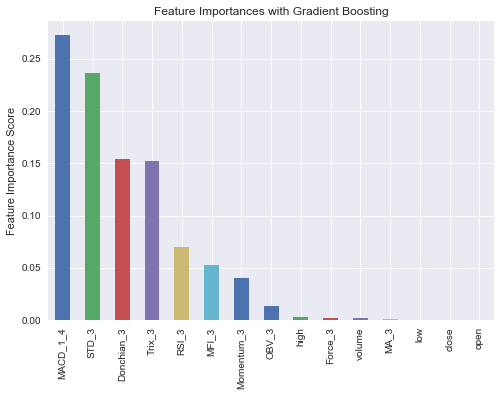

In [34]:
from sklearn.preprocessing import label_binarize
minutedata['TRD_3'] = label_binarize(minutedata['TRD_3'], classes=[1, 2, 3])
target = 'TRD_3'
IDcol = 'rank_id'
predictors = [x for x in minutedata.columns if x not in [target, IDcol]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, minutedata, predictors)

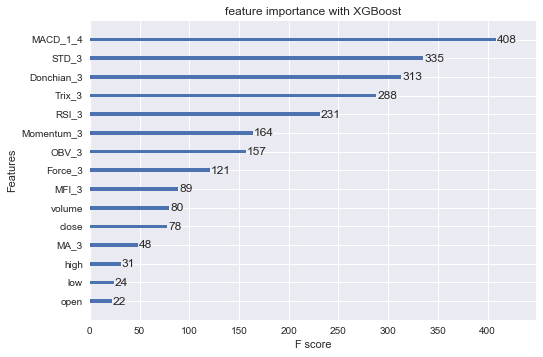

In [35]:

num_test = 0.20
seed = 10
(X_all_minute, y_all_minute) = (minutedata.drop("TRD_3", axis = 1, inplace = False), minutedata["TRD_3"])
X_train, X_test, y_train, y_test = train_test_split(X_all_minute, y_all_minute, random_state=seed)
model_0 = xgb.XGBClassifier(learning_rate = 0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1, seed = seed).fit(X_test, y_test, verbose = True, eval_metric="auc")
xgb.plot_importance(model_0,title="feature importance with XGBoost")
plt.show()

/Users/dingding/anaconda/lib/python3.5/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/Users/dingding/anaconda/lib/python3.5/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)



Test accuracy with all features: 	0.8118541033434651
Validation accuracy with all features: 	0.8295440729483282

gen	nevals	avg     	std      	min    	max     
0  	100   	0.797062	0.0497898	0.63997	0.878723
1  	57    	0.8299  	0.0323172	0.698936	0.878723
2  	59    	0.850179	0.0145606	0.807143	0.885714
3  	58    	0.859097	0.0145837	0.790578	0.88693 
4  	65    	0.866901	0.0134606	0.828116	0.88693 
5  	65    	0.873167	0.0209067	0.70076 	0.88693 
6  	56    	0.879432	0.00725503	0.82538 	0.889666
7  	67    	0.879526	0.0203831 	0.699392	0.895441
8  	70    	0.879096	0.0351709 	0.663374	0.895441
9  	61    	0.880464	0.0411248 	0.621581	0.895441
10 	67    	0.887454	0.022396  	0.701216	0.896201

---Optimal Feature Subset(s)---

Percentile: 			0.9817232375979112
Validation Accuracy: 		0.9045592705167174
Individual: 	[0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]
Number Features In Subset: 	5
Feature Subset: ['high', 'low', 'MA_3', 'MACD_1_4', 'OBV_3']
Percentile: 			0.9843342036553525


/Users/dingding/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Validation Accuracy: 		0.9045592705167174
Individual: 	[1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0]
Number Features In Subset: 	7
Feature Subset: ['close', 'open', 'Trix_3', 'MACD_1_4', 'OBV_3', 'Force_3', 'STD_3']
0


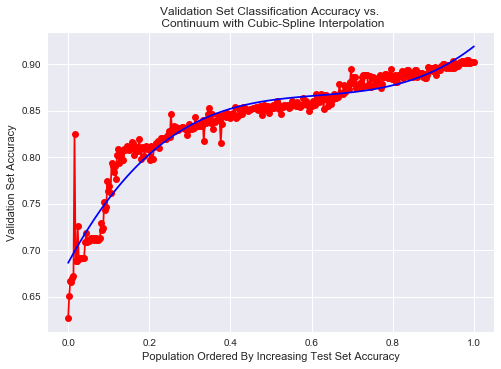

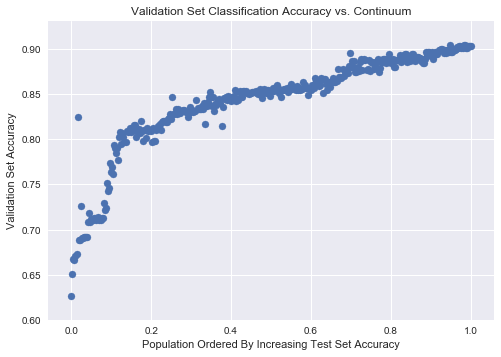

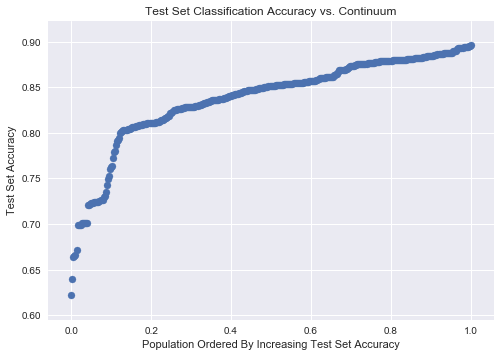

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from deap import creator, base, tools, algorithms
#from scoop import futures
import random
import numpy
from scipy import interpolate
import matplotlib.pyplot as plt



# Form training, test, and validation sets
X_trainAndTest, X_validation, y_trainAndTest, y_validation = train_test_split(X_all_minute, y_all_minute, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_trainAndTest, y_trainAndTest, test_size=0.20, random_state=42)

# Feature subset fitness function
def getFitness(individual, X_train, X_test, y_train, y_test):

	# Parse our feature columns that we don't use
	# Apply one hot encoding to the features
	cols = [index for index in range(len(individual)) if individual[index] == 0]
	X_trainParsed = X_train.drop(X_train.columns[cols], axis=1)
	X_trainOhFeatures = pd.get_dummies(X_trainParsed)
	X_testParsed = X_test.drop(X_test.columns[cols], axis=1)
	X_testOhFeatures = pd.get_dummies(X_testParsed)

	# Remove any columns that aren't in both the training and test sets
	sharedFeatures = set(X_trainOhFeatures.columns) & set(X_testOhFeatures.columns)
	removeFromTrain = set(X_trainOhFeatures.columns) - sharedFeatures
	removeFromTest = set(X_testOhFeatures.columns) - sharedFeatures
	X_trainOhFeatures = X_trainOhFeatures.drop(list(removeFromTrain), axis=1)
	X_testOhFeatures = X_testOhFeatures.drop(list(removeFromTest), axis=1)

	# Apply logistic regression on the data, and calculate accuracy
	clf = LogisticRegression()
	clf.fit(X_trainOhFeatures, y_train)
	predictions = clf.predict(X_testOhFeatures)
	accuracy = accuracy_score(y_test, predictions)

	# Return calculated accuracy as fitness
	return (accuracy,)

#========DEAP GLOBAL VARIABLES (viewable by SCOOP)========

# Create Individual
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Create Toolbox
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(minutedata.columns) - 1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Continue filling toolbox...
toolbox.register("evaluate", getFitness, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

#========

def getHof():

	# Initialize variables to use eaSimple
	numPop = 100
	numGen = 10
	pop = toolbox.population(n=numPop)
	hof = tools.HallOfFame(numPop * numGen)
	stats = tools.Statistics(lambda ind: ind.fitness.values)
	stats.register("avg", numpy.mean)
	stats.register("std", numpy.std)
	stats.register("min", numpy.min)
	stats.register("max", numpy.max)

	# Launch genetic algorithm
	pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=numGen, stats=stats, halloffame=hof, verbose=True)

	# Return the hall of fame
	return hof

def getMetrics(hof):

	# Get list of percentiles in the hall of fame
	percentileList = [i / (len(hof) - 1) for i in range(len(hof))]
	
	# Gather fitness data from each percentile
	testAccuracyList = []
	validationAccuracyList = []
	individualList = []
	for individual in hof:
		testAccuracy = individual.fitness.values
		validationAccuracy = getFitness(individual, X_trainAndTest, X_validation, y_trainAndTest, y_validation)
		testAccuracyList.append(testAccuracy[0])
		validationAccuracyList.append(validationAccuracy[0])
		individualList.append(individual)
	testAccuracyList.reverse()
	validationAccuracyList.reverse()
	return testAccuracyList, validationAccuracyList, individualList, percentileList


if __name__ == '__main__':

	'''
	First, we will apply logistic regression using all the features to acquire a baseline accuracy.
	'''
	individual = [1 for i in range(len(X_all_minute.columns))]
	testAccuracy = getFitness(individual, X_train, X_test, y_train, y_test)
	validationAccuracy = getFitness(individual, X_trainAndTest, X_validation, y_trainAndTest, y_validation)
	print('\nTest accuracy with all features: \t' + str(testAccuracy[0]))
	print('Validation accuracy with all features: \t' + str(validationAccuracy[0]) + '\n')

	'''
	Now, we will apply a genetic algorithm to choose a subset of features that gives a better accuracy than the baseline.
	'''
	hof = getHof()
	testAccuracyList, validationAccuracyList, individualList, percentileList = getMetrics(hof)

	# Get a list of subsets that performed best on validation data
	maxValAccSubsetIndicies = [index for index in range(len(validationAccuracyList)) if validationAccuracyList[index] == max(validationAccuracyList)]
	maxValIndividuals = [individualList[index] for index in maxValAccSubsetIndicies]
	maxValSubsets = [[list(X_all_minute)[index] for index in range(len(individual)) if individual[index] == 1] for individual in maxValIndividuals]

	print('\n---Optimal Feature Subset(s)---\n')
	for index in range(len(maxValAccSubsetIndicies)):
		print('Percentile: \t\t\t' + str(percentileList[maxValAccSubsetIndicies[index]]))
		print('Validation Accuracy: \t\t' + str(validationAccuracyList[maxValAccSubsetIndicies[index]]))
		print('Individual: \t' + str(maxValIndividuals[index]))
		print('Number Features In Subset: \t' + str(len(maxValSubsets[index])))
		print('Feature Subset: ' + str(maxValSubsets[index]))

	'''
	Now, we plot the test and validation classification accuracy to see how these numbers change as we move from our worst feature subsets to the 
	best feature subsets found by the genetic algorithm.
	'''
	# Calculate best fit line for validation classification accuracy (non-linear)
	tck = interpolate.splrep(percentileList, validationAccuracyList, s=5.0)
	ynew = interpolate.splev(percentileList, tck)

	e = plt.figure(1)
	plt.plot(percentileList, validationAccuracyList, marker='o', color='r')
	plt.plot(percentileList, ynew, color='b')
	plt.title('Validation Set Classification Accuracy vs. \n Continuum with Cubic-Spline Interpolation')
	plt.xlabel('Population Ordered By Increasing Test Set Accuracy')
	plt.ylabel('Validation Set Accuracy')
	e.show()

	f = plt.figure(2)
	plt.scatter(percentileList, validationAccuracyList)
	plt.title('Validation Set Classification Accuracy vs. Continuum')
	plt.xlabel('Population Ordered By Increasing Test Set Accuracy')
	plt.ylabel('Validation Set Accuracy')
	f.show()

	g = plt.figure(3)
	plt.scatter(percentileList, testAccuracyList)
	plt.title('Test Set Classification Accuracy vs. Continuum')
	plt.xlabel('Population Ordered By Increasing Test Set Accuracy')
	plt.ylabel('Test Set Accuracy')
	g.show()

	input()

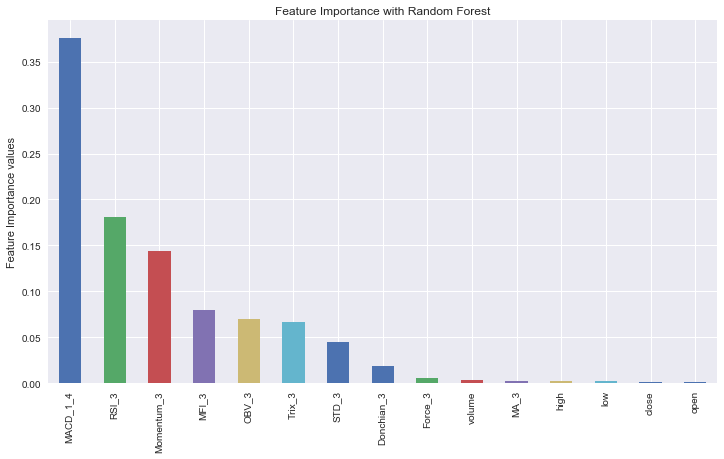

In [20]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_all_minute, y_all_minute, random_state=seed)
rf_clf = RandomForestClassifier(max_depth=15,n_estimators=70, min_samples_leaf=50,
                                  min_samples_split=100, random_state=10)

# Train the model
rf_clf.fit(X_train,y_train)

# Plot the top 40 important features
imp_feat_rf = pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
imp_feat_rf[:40].plot(kind='bar', title='Feature Importance with Random Forest', figsize=(12,8))
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)
plt.savefig('FeatImportance.png')
plt.show()




Feature ranking:
1. feature 9 (0.296837)
2. feature 7 (0.138008)
3. feature 10 (0.133440)
4. feature 13 (0.059779)
5. feature 8 (0.059500)
6. feature 6 (0.045086)
7. feature 14 (0.042232)
8. feature 11 (0.034202)
9. feature 4 (0.029561)
10. feature 12 (0.029545)
11. feature 5 (0.026974)
12. feature 0 (0.026380)
13. feature 3 (0.026176)
14. feature 2 (0.026155)
15. feature 1 (0.026125)


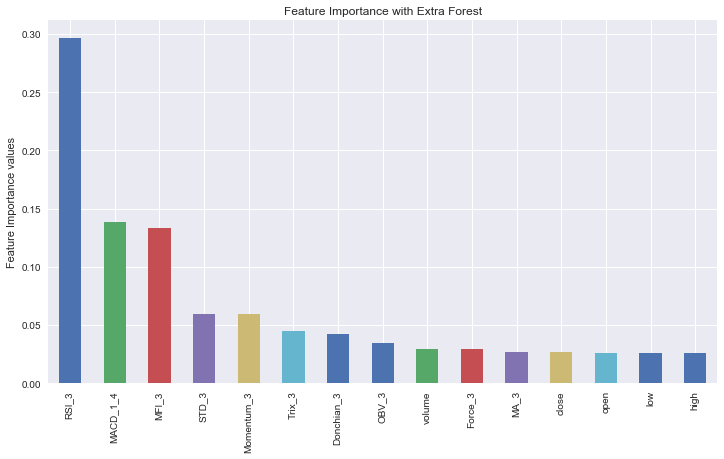

In [36]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier



# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train,y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

imp_feat_rf = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
imp_feat_rf[:40].plot(kind='bar', title='Feature Importance with Extra Forest', figsize=(12,8))
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)
plt.savefig('FeatImportance.png')
plt.show()

